Loading dataset...
Training models...
Calculating metrics...
Saving visualizations...


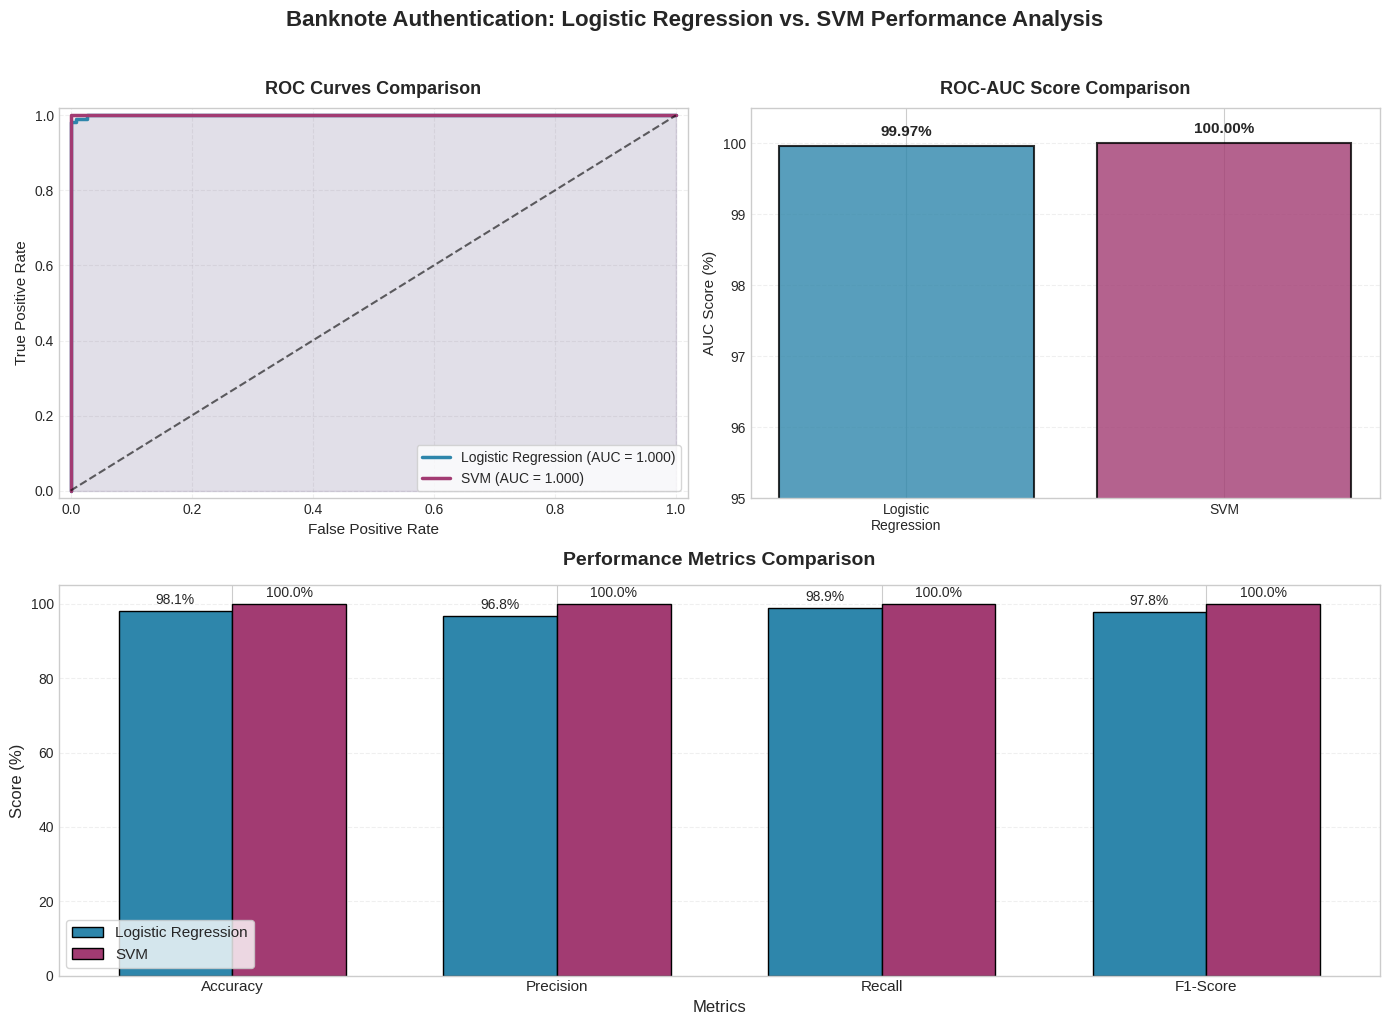

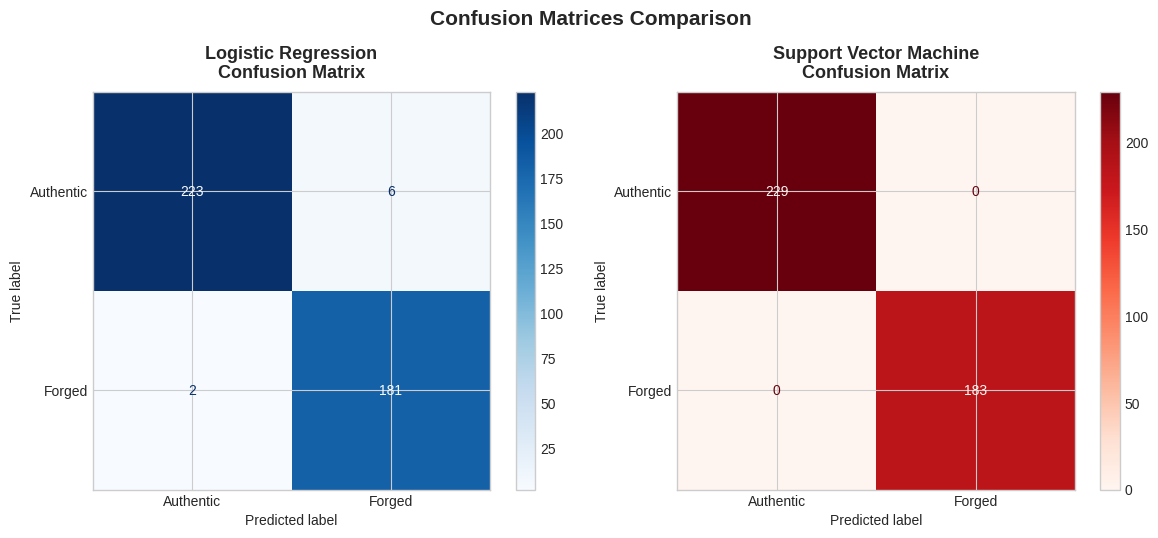


PERFORMANCE SUMMARY

Dataset: Banknote Authentication (UCI)
Total Samples: 1372
Training Samples: 960
Testing Samples: 412
Authentic Notes: 762
Forged Notes: 610

MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  Precision  Recall  F1-Score    AUC
   Logistic Regression     98.06      96.79   98.91     97.84  99.97
Support Vector Machine    100.00     100.00  100.00    100.00 100.00

ROC-AUC ANALYSIS
Logistic Regression AUC: 0.9997
Support Vector Machine AUC: 1.0000
AUC Difference: 0.0003

RESEARCH CONCLUSION
✓ Support Vector Machine performs BETTER with AUC = 1.000
  (vs. Logistic Regression AUC = 1.000)
  Performance advantage: 0.0%

✓ Visualizations saved as:
  - 'banknote_performance_analysis.png' (Main analysis)
  - 'banknote_confusion_matrices.png' (Confusion matrices)


In [1]:
"""
Banknote Authentication: Compact Visual Analysis
Logistic Regression vs. Support Vector Machine
"""

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, ConfusionMatrixDisplay, 
                           roc_auc_score, roc_curve)

# Set style for professional look
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load dataset
print("Loading dataset...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv(url, names=columns)

# Prepare data
X = data.drop('class', axis=1)
y = data['class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train models
print("Training models...")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
svm_model = SVC(random_state=42, probability=True)

log_reg.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate metrics
print("Calculating metrics...")
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_svm = roc_auc_score(y_test, y_prob_svm)

metrics_data = {
    'Model': ['Logistic Regression', 'Support Vector Machine'],
    'Accuracy': [
        round(accuracy_score(y_test, y_pred_lr) * 100, 2),
        round(accuracy_score(y_test, y_pred_svm) * 100, 2)
    ],
    'Precision': [
        round(precision_score(y_test, y_pred_lr) * 100, 2),
        round(precision_score(y_test, y_pred_svm) * 100, 2)
    ],
    'Recall': [
        round(recall_score(y_test, y_pred_lr) * 100, 2),
        round(recall_score(y_test, y_pred_svm) * 100, 2)
    ],
    'F1-Score': [
        round(f1_score(y_test, y_pred_lr) * 100, 2),
        round(f1_score(y_test, y_pred_svm) * 100, 2)
    ],
    'AUC': [round(auc_lr * 100, 2), round(auc_svm * 100, 2)]
}

metrics_df = pd.DataFrame(metrics_data)

# Create 2x2 grid of subplots
fig = plt.figure(figsize=(14, 10))

# 1. ROC-AUC CURVES (Top Left - Span 2 columns)
ax1 = plt.subplot(2, 2, 1)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

ax1.plot(fpr_lr, tpr_lr, color='#2E86AB', lw=2.5, 
         label=f'Logistic Regression (AUC = {auc_lr:.3f})')
ax1.plot(fpr_svm, tpr_svm, color='#A23B72', lw=2.5, 
         label=f'SVM (AUC = {auc_svm:.3f})')
ax1.plot([0, 1], [0, 1], 'k--', lw=1.5, alpha=0.6)
ax1.set_xlabel('False Positive Rate', fontsize=11, fontweight='medium')
ax1.set_ylabel('True Positive Rate', fontsize=11, fontweight='medium')
ax1.set_title('ROC Curves Comparison', fontsize=13, fontweight='bold', pad=10)
ax1.legend(loc='lower right', frameon=True, fancybox=True)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim([-0.02, 1.02])
ax1.set_ylim([-0.02, 1.02])
ax1.fill_between(fpr_lr, tpr_lr, alpha=0.1, color='#2E86AB')
ax1.fill_between(fpr_svm, tpr_svm, alpha=0.1, color='#A23B72')

# 2. AUC SCORE COMPARISON (Top Right)
ax2 = plt.subplot(2, 2, 2)
models = ['Logistic\nRegression', 'SVM']
colors = ['#2E86AB', '#A23B72']
bars = ax2.bar(models, [auc_lr * 100, auc_svm * 100], color=colors, 
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_ylabel('AUC Score (%)', fontsize=11, fontweight='medium')
ax2.set_title('ROC-AUC Score Comparison', fontsize=13, fontweight='bold', pad=10)
ax2.set_ylim([95, 100.5])
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')

# Add value labels
for bar, score in zip(bars, [auc_lr * 100, auc_svm * 100]):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{score:.2f}%', ha='center', va='bottom', 
            fontweight='bold', fontsize=11)

# 3. METRICS COMPARISON (Bottom Left - Span 2 columns)
ax3 = plt.subplot(2, 2, (3, 4))  # This spans columns 3 and 4 in row 2
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics_to_plot))
width = 0.35

bars_lr = ax3.bar(x - width/2, 
                 metrics_df.loc[0, metrics_to_plot], 
                 width, label='Logistic Regression',
                 color='#2E86AB', edgecolor='black', linewidth=1)
bars_svm = ax3.bar(x + width/2, 
                  metrics_df.loc[1, metrics_to_plot], 
                  width, label='SVM',
                  color='#A23B72', edgecolor='black', linewidth=1)

ax3.set_xlabel('Metrics', fontsize=12, fontweight='medium')
ax3.set_ylabel('Score (%)', fontsize=12, fontweight='medium')
ax3.set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold', pad=15)
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_to_plot, fontsize=11)
ax3.set_ylim([0, 105])
ax3.legend(frameon=True, fancybox=True, fontsize=11)
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')

# Add value labels
for bars in [bars_lr, bars_svm]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', 
                fontsize=10, fontweight='medium')

# Create a separate figure for confusion matrices
fig2, (ax4, ax5) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, 
                                display_labels=['Authentic', 'Forged'])
disp_lr.plot(ax=ax4, cmap='Blues', colorbar=True, 
            values_format='d')
ax4.set_title('Logistic Regression\nConfusion Matrix', fontsize=13, fontweight='bold', pad=10)

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, 
                                 display_labels=['Authentic', 'Forged'])
disp_svm.plot(ax=ax5, cmap='Reds', colorbar=True, 
             values_format='d')
ax5.set_title('Support Vector Machine\nConfusion Matrix', fontsize=13, fontweight='bold', pad=10)

fig2.suptitle('Confusion Matrices Comparison', fontsize=15, fontweight='bold', y=1.02)
fig2.tight_layout()

# Add main title to first figure
fig.suptitle('Banknote Authentication: Logistic Regression vs. SVM Performance Analysis', 
             fontsize=16, fontweight='bold', y=1.02)

# Adjust layout
fig.tight_layout()

# Save figures
print("Saving visualizations...")
fig.savefig('banknote_performance_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
fig2.savefig('banknote_confusion_matrices.png', dpi=300, bbox_inches='tight', facecolor='white')

# Display
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("PERFORMANCE SUMMARY")
print("="*60)
print(f"\nDataset: Banknote Authentication (UCI)")
print(f"Total Samples: {len(data)}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")
print(f"Authentic Notes: {len(data[data['class'] == 0])}")
print(f"Forged Notes: {len(data[data['class'] == 1])}")

print(f"\n" + "="*60)
print(f"MODEL PERFORMANCE COMPARISON")
print("="*60)
print(metrics_df.to_string(index=False))

print(f"\n" + "="*60)
print(f"ROC-AUC ANALYSIS")
print("="*60)
print(f"Logistic Regression AUC: {auc_lr:.4f}")
print(f"Support Vector Machine AUC: {auc_svm:.4f}")
print(f"AUC Difference: {abs(auc_lr - auc_svm):.4f}")

# Determine winner
print(f"\n" + "="*60)
print(f"RESEARCH CONCLUSION")
print("="*60)
if auc_lr > auc_svm:
    print(f"✓ Logistic Regression performs BETTER with AUC = {auc_lr:.3f}")
    print(f"  (vs. SVM AUC = {auc_svm:.3f})")
    print(f"  Performance advantage: {(auc_lr - auc_svm)/auc_svm * 100:.1f}%")
elif auc_svm > auc_lr:
    print(f"✓ Support Vector Machine performs BETTER with AUC = {auc_svm:.3f}")
    print(f"  (vs. Logistic Regression AUC = {auc_lr:.3f})")
    print(f"  Performance advantage: {(auc_svm - auc_lr)/auc_lr * 100:.1f}%")
else:
    print(f"✓ Both models perform EQUALLY with AUC = {auc_lr:.3f}")

print(f"\n✓ Visualizations saved as:")
print(f"  - 'banknote_performance_analysis.png' (Main analysis)")
print(f"  - 'banknote_confusion_matrices.png' (Confusion matrices)")